<a href="https://colab.research.google.com/github/LabSWPP12023S2G2/TPInicial/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Cargar los datos (reemplaza esto con la carga de tus datos)
url = 'https://raw.githubusercontent.com/LabSWPP12023S2G2/TPInicial/main/datasetUNC.csv'
data = pd.read_csv(url, delimiter=';')
columns_to_drop = ['SUB PERIODS']
data = data.drop(columns=columns_to_drop)
data = data.dropna(axis=0)
data.drop(data[data['PROVINCE'] == 'Otro'].index, inplace=True)
data.drop(data[data['PROVINCE'] == 'other'].index, inplace=True)

In [38]:
# Aplicar K-Means para clasificar las provincias en grupos
province_data = data.groupby('PROVINCE').mean()
kmeans = KMeans(n_clusters=5, random_state=0).fit(province_data[['SUIC RISK']])

# Asignar un color a cada provincia en base a los clusters
province_data['Cluster'] = kmeans.labels_

<ipython-input-38-245012136d0e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  province_data = data.groupby('PROVINCE').mean()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
province_data

,AGE,DEPRESSION,SUIC RISK,ANXIETY STATE,ANXIETY TRAIT,Cluster
PROVINCE,,,,,,
Buenos Aires provincia,30.964444,18.475556,34.466667,34.711111,29.355556,0
CABA (Buenos Aires capital),34.295918,14.561224,32.193878,34.244898,28.561224,0
Catamarca,33.500000,18.000000,51.000000,38.500000,37.000000,3
Chaco,37.285714,13.714286,25.857143,31.428571,24.000000,1
Chubut,31.250000,17.250000,28.250000,33.000000,28.250000,1
Corrientes,29.200000,11.000000,25.400000,21.800000,18.000000,1
Córdoba,35.615970,12.517110,26.167300,28.346008,23.593156,1
Entre Ríos,21.400000,23.000000,37.533333,34.066667,31.200000,4
Formosa,25.333333,29.333333,36.000000,43.000000,32.000000,0


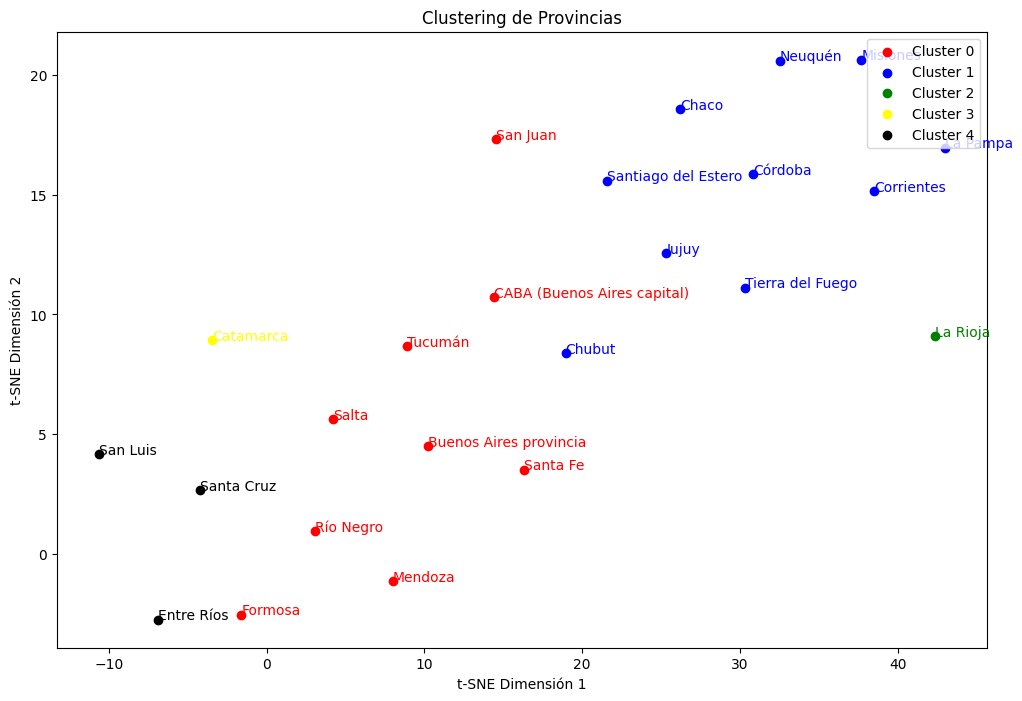

In [40]:
# Definir colores de los clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'black'}

# Visualización de las provincias por cluster
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
tsne_data = tsne.fit_transform(province_data.drop(columns=['Cluster']))
province_data['tsne_x'] = tsne_data[:, 0]
province_data['tsne_y'] = tsne_data[:, 1]

# Gráfico de dispersión
plt.figure(figsize=(12, 8))
for cluster, color in cluster_colors.items():
    cluster_data = province_data[province_data['Cluster'] == cluster]
    plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'],
                label=f'Cluster {cluster}', color=color)

# Etiquetas de provincias por nombre
for index, row in province_data.iterrows():
    plt.text(row['tsne_x'], row['tsne_y'], index, fontsize=10, color=cluster_colors[row['Cluster']])

plt.title('Clustering de Provincias')
plt.xlabel('t-SNE Dimensión 1')
plt.ylabel('t-SNE Dimensión 2')
plt.legend()
plt.show()